<a href="https://colab.research.google.com/github/deepakSingh-dev/StockForecasting/blob/main/Real_Time_Stock_Price_Forecasting_of_MAANG_Companies_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

sns.set_style('darkgrid')
plt.style.use("fivethirtyeight")

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the path to the extracted dataset
data_path = '/content/drive/MyDrive/MAANG_Stock_Data'

# Helper function to load datasets
def load_data(file_path):
    return pd.read_csv(file_path)

# Load all datasets
daily_files = [f for f in os.listdir(data_path) if 'daily' in f]
dfs = {}

for file in daily_files:
    company_name = file.split('_')[0]
    dfs[company_name] = load_data(os.path.join(data_path, file))

In [ ]:
# Display sample data for one company
sample_company = list(dfs.keys())[0]
print(f"Sample data for {sample_company}:")
print(dfs[sample_company].head())



Sample data for GOOGLE:
         Date      Open      High       Low     Close  Adj Close     Volume
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.490186  897427216
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.687981  458857488
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.715032  366857939
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.602608  306396159
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.630652  184645512


In [ ]:
# Plot candlestick charts for all companies
def create_candlestick(df, name):
    figure = go.Figure(data=[go.Candlestick(x=df["Date"],
                                            open=df["Open"],
                                            high=df["High"],
                                            low=df["Low"],
                                            close=df["Close"])]
    )
    figure.update_layout(title=f"{name} Stock Prices",
                         xaxis_rangeslider_visible=False)
    figure.show()

for company, df in dfs.items():
    create_candlestick(df, company)

In [ ]:
# Combine data for analysis
combined_df = pd.concat([df.assign(Company=company) for company, df in dfs.items()])

# Plot closing prices for all companies
fig = px.line(combined_df, x='Date', y='Close', color='Company',
              title='Closing Prices for All Companies')
fig.show()

In [ ]:
# Add moving averages and volatility
combined_df['MA20'] = combined_df.groupby('Company')['Close'].rolling(window=20).mean().reset_index(drop=True)
combined_df['MA50'] = combined_df.groupby('Company')['Close'].rolling(window=50).mean().reset_index(drop=True)
combined_df['Volatility'] = combined_df.groupby('Company')['Close'].pct_change().rolling(window=10).std().reset_index(drop=True)

# Plot moving averages for each company
for company, group in combined_df.groupby('Company'):
    fig = px.line(group, x='Date', y=['Close', 'MA20', 'MA50'],
                  title=f"Moving Averages for {company}")
    fig.show()


In [ ]:
# Plot closing price instead of volatility
fig = px.line(
    filtered_df,
    x='Date',
    y='Close',  # Replace 'Volatility' with an existing column like 'Close'
    color='Company',
    title='Closing Price for Amazon (2020-2024)'
)
fig.show()

In [ ]:
combined_df = pd.read_csv('/content/Our Data/APPLE_monthly.csv')
combined_df['Company'] = 'Apple'
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
filtered_df = combined_df[(combined_df['Date'] >= '2020-01-01') & (combined_df['Date'] <= '2024-12-31')]
fig = px.line(
    filtered_df,
    x='Date',
    y='Close',
    color='Company',
    title='Closing Price for Apple (2020-2024)'
)
fig.show()

In [ ]:
combined_df = pd.read_csv('/content/Our Data/GOOGLE_monthly.csv')
combined_df['Company'] = 'Google'
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
filtered_df = combined_df[(combined_df['Date'] >= '2020-01-01') & (combined_df['Date'] <= '2024-12-31')]
fig = px.line(
    filtered_df,
    x='Date',
    y='Close',
    color='Company',
    title='Closing Price for Google (2020-2024)'
)
fig.show()

In [ ]:
combined_df = pd.read_csv('/content/Our Data/META_monthly.csv')
combined_df['Company'] = 'Meta'
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
filtered_df = combined_df[(combined_df['Date'] >= '2020-01-01') & (combined_df['Date'] <= '2024-12-31')]
fig = px.line(
    filtered_df,
    x='Date',
    y='Close',
    color='Company',
    title='Closing Price for Meta (2020-2024)'
)
fig.show()

In [ ]:
combined_df = pd.read_csv('/content/Our Data/NETFLIX_monthly.csv')
combined_df['Company'] = 'Netflix'
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
filtered_df = combined_df[(combined_df['Date'] >= '2020-01-01') & (combined_df['Date'] <= '2024-12-31')]
fig = px.line(
    filtered_df,
    x='Date',
    y='Close',
    color='Company',
    title='Closing Price for Netflix (2020-2024)'
)
fig.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Prepare data for LSTM modeling
company_to_predict = 'NETFLIX'  # Example: Predicting Netflix stock prices

data = dfs[company_to_predict]
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Use closing price for prediction
close_prices = data['Close'].values

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices.reshape(-1, 1))

In [ ]:
# Create training and testing datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - 100:]

In [ ]:
# Generate sequences for LSTM
look_back = 100
def create_sequences(data, look_back):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data, look_back)
X_test, y_test = create_sequences(test_data, look_back)

In [ ]:
# Reshape data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 46s 152ms/step - loss: 0.0020
Epoch 2/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 81s 150ms/step - loss: 1.9595e-04
Epoch 3/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 79s 138ms/step - loss: 1.5251e-04
Epoch 4/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 41s 139ms/step - loss: 1.4612e-04
Epoch 5/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 41s 141ms/step - loss: 1.6148e-04
Epoch 6/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 40s 144ms/step - loss: 1.1539e-04
Epoch 7/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 40s 140ms/step - loss: 1.2929e-04
Epoch 8/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 45s 153ms/step - loss: 9.6105e-05
Epoch 9/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 79s 143ms/step - loss: 1.3640e-04
Epoch 10/10
278/278 ━━━━━━━━━━━━━━━━━━━━ 40s 144ms/step - loss: 1.1044e-04


In [ ]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step


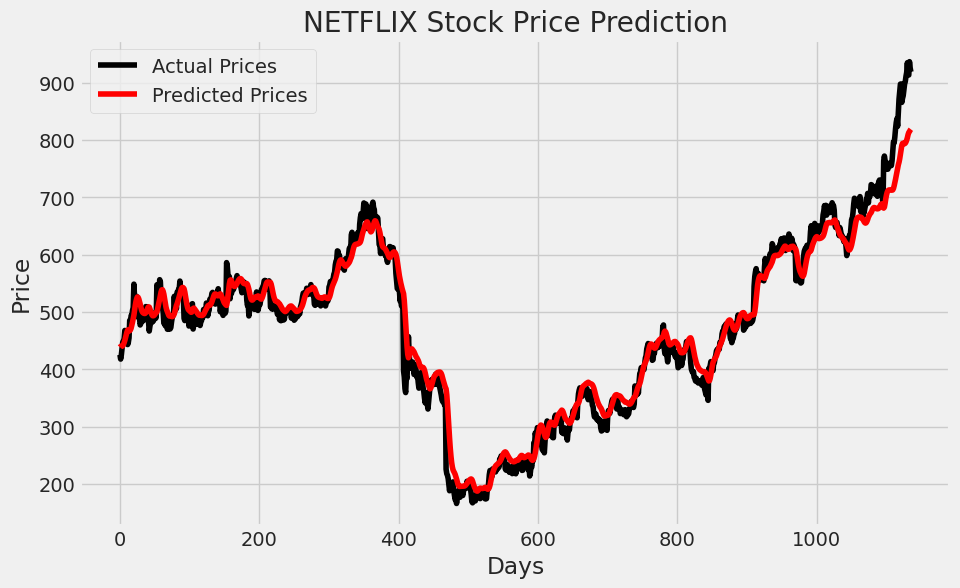

In [ ]:
# Evaluate the model
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual Prices', color='black')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title(f"{company_to_predict} Stock Price Prediction")0
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

12.978708892796064

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os

daily_path, weekly_path, monthly_path  = [], [], []
for dirname, _, filenames in os.walk('/content/data'):
    for filename in filenames:
        if filename.split('_')[1] == 'daily.csv':
            daily_path.append(os.path.join(dirname, filename))
        elif filename.split('_')[1] == 'weekly.csv':
            weekly_path.append(os.path.join(dirname, filename))
        else:
            monthly_path.append(os.path.join(dirname, filename))

def create_df_list(path=daily_path, date='2020-01-01'):
    df_list = []
    companies = ['GOOG', 'AMZN', 'AAPL', 'META', 'NFLX']
    for i, path in enumerate(daily_path):
        df = pd.read_csv(path)
        df = df[df['Date'] >= date]
#         df = df.iloc[-251:, :]
        df['Ticker'] = companies[i]
        df_list.append(df)
    return df_list

df_list = create_df_list()
goog_df, amzn_df, aapl_df, meta_df, nflx_df = df_list

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
train_data = amzn_df.iloc[:-60, 4].values

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(train_data.reshape(-1, 1))

# Create separate lists for features and labels
x_train, y_train = [], []

# Store data for previous 100 days in x_train and the outcomes in y_train
for i in range(100, len(scaled_data)):
    x_train.append(scaled_data[i-100:i, 0])
    y_train.append(scaled_data[i, 0])

# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(f"Shape of x_train: {x_train.shape}\nShape of y_train: {y_train.shape}")

# this is a breakkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk

model = Sequential()
# Add first LSTM layer with dropout
model.add(LSTM(units=64, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))
# Add second LSTM layer with dropout
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
# Add third LSTM layer
model.add(LSTM(units=64, return_sequences=False))
# Add dense layer
# model.add(Dense(units=25))
# Add output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=16)

Shape of x_train: (1087, 100, 1)
Shape of y_train: (1087,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 16s 168ms/step - loss: 0.0400
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 19s 145ms/step - loss: 0.0024
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - loss: 0.0024
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 18s 119ms/step - loss: 0.0021
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - loss: 0.0021
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - loss: 0.0031
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - loss: 0.0018
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - loss: 0.0018
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - loss: 0.0016
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - loss: 0.0015
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - loss: 0.0016
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - loss: 0.0019
Epoch 13/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - loss: 0.0016
Epoch 14/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - loss: 0.0013
Epoch 15/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 121m

In [ ]:
test_data = amzn_df.iloc[-60-100:, 4].values
test_data_scaled = scaler.transform(test_data.reshape(-1, 1))

x_test = []
for i in range(100, len(test_data_scaled)):
    x_test.append(test_data_scaled[i-100:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = np.array(amzn_df.iloc[-60:, 4].values)
print(f"Shape of x_test: {x_test.shape}\nShape of y_test: {y_test.shape}")
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

Shape of x_test: (60, 100, 1)
Shape of y_test: (60,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step


10.705178439536942

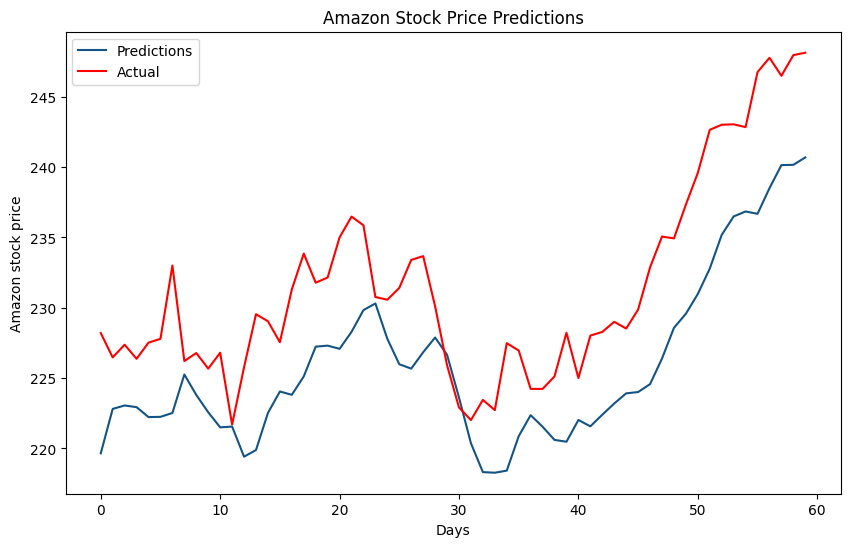

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(predictions, color = '#135485', label = "Predictions")
plt.plot(y_test, color = 'red', label = "Actual")
plt.xlabel('Days')
plt.ylabel('Amazon stock price')
plt.title("Amazon Stock Price Predictions")
plt.legend()
plt.show()

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

12.978708892796064

In [ ]:
n=0
for n in range (0,5):
  train_data = df_list[n].iloc[:-60, 4].values

  # Normalize the data
  scaler = MinMaxScaler()
  scaled_data = scaler.fit_transform(train_data.reshape(-1, 1))

  # Create separate lists for features and labels
  x_train, y_train = [], []

  # Store data for previous 100 days in x_train and the outcomes in y_train
  for i in range(100, len(scaled_data)):
      x_train.append(scaled_data[i-100:i, 0])
      y_train.append(scaled_data[i, 0])

  # Convert x_train and y_train to numpy arrays
  x_train, y_train = np.array(x_train), np.array(y_train)
  # Reshape the data
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
  print(f"Shape of x_train: {x_train.shape}\nShape of y_train: {y_train.shape}")

  # this is a breakkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk

  model = Sequential()
  # Add first LSTM layer with dropout
  model.add(LSTM(units=64, return_sequences=True, input_shape= (x_train.shape[1], 1)))
  model.add(Dropout(0.2))
  # Add second LSTM layer with dropout
  model.add(LSTM(units=64, return_sequences=True))
  model.add(Dropout(0.2))
  # Add third LSTM layer
  model.add(LSTM(units=64, return_sequences=False))
  # Add dense layer
  # model.add(Dense(units=25))
  # Add output layer
  model.add(Dense(units=1))

  # Compile the model
  model.compile(optimizer='adam', loss='mean_squared_error')

  # Train the model
  model.fit(x_train, y_train, epochs=50, batch_size=16)


Shape of x_train: (1087, 100, 1)
Shape of y_train: (1087,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 14s 140ms/step - loss: 0.0472
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0026
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - loss: 0.0023
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - loss: 0.0019
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - loss: 0.0022
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - loss: 0.0018
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - loss: 0.0021
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - loss: 0.0016
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - loss: 0.0013
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - loss: 0.0017
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - loss: 0.0016
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - loss: 0.0020
Epoch 13/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - loss: 0.0021
Epoch 14/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0013
Epoch 15/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 14s 145ms/step - loss: 0.0572
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - loss: 0.0027
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - loss: 0.0022
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - loss: 0.0026
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step - loss: 0.0021
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - loss: 0.0020
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - loss: 0.0019
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - loss: 0.0017
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step - loss: 0.0019
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - loss: 0.0014
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0016
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - loss: 0.0018
Epoch 13/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0013
Epoch 14/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - loss: 0.0015
Epoch 15/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - lo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 14s 149ms/step - loss: 0.0720
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 17s 244ms/step - loss: 0.0050
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 14s 144ms/step - loss: 0.0051
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - loss: 0.0054
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0043
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - loss: 0.0039
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 12s 157ms/step - loss: 0.0041
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 18s 122ms/step - loss: 0.0032
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - loss: 0.0034
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - loss: 0.0030
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - loss: 0.0033
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - loss: 0.0029
Epoch 13/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - loss: 0.0028
Epoch 14/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - loss: 0.0026
Epoch 15/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 18s 127ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 14s 143ms/step - loss: 0.0448
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0025
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 12s 138ms/step - loss: 0.0024
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - loss: 0.0022
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - loss: 0.0023
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - loss: 0.0024
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - loss: 0.0016
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - loss: 0.0017
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - loss: 0.0017
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - loss: 0.0015
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - loss: 0.0016
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 0.0014
Epoch 13/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step - loss: 0.0014
Epoch 14/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - loss: 0.0014
Epoch 15/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - lo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 14s 127ms/step - loss: 0.0490
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0045
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - loss: 0.0038
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0043
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - loss: 0.0027
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - loss: 0.0035
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - loss: 0.0032
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - loss: 0.0032
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - loss: 0.0029
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - loss: 0.0022
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - loss: 0.0025
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - loss: 0.0021
Epoch 13/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - loss: 0.0019
Epoch 14/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - loss: 0.0021
Epoch 15/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - l

Shape of x_test: (60, 100, 1)
Shape of y_test: (60,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 774ms/step


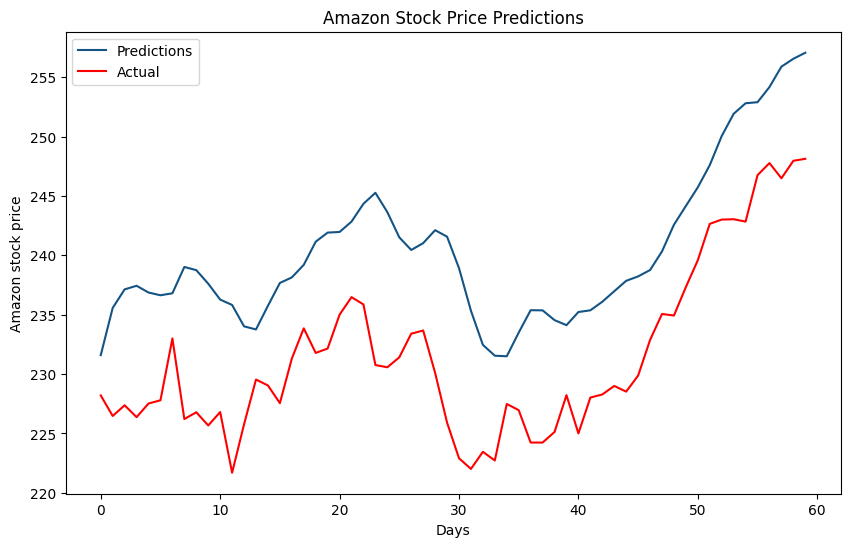

In [ ]:
test_data = amzn_df.iloc[-60-100:, 4].values
test_data_scaled = scaler.transform(test_data.reshape(-1, 1))

x_test = []
for i in range(100, len(test_data_scaled)):
    x_test.append(test_data_scaled[i-100:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = np.array(amzn_df.iloc[-60:, 4].values)
print(f"Shape of x_test: {x_test.shape}\nShape of y_test: {y_test.shape}")
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

plt.figure(figsize=(10,6))
plt.plot(predictions, color = '#135485', label = "Predictions")
plt.plot(y_test, color = 'red', label = "Actual")
plt.xlabel('Days')
plt.ylabel('Amazon stock price')
plt.title("Amazon Stock Price Predictions")
plt.legend()
plt.show()

RMSE: 12.978708892796064
